# <center> **Interaction and Quadratic Models For Biomedical Data Study** </center>

In [1]:
## Loading Librarbies and Checking For Availability
try:
    import pandas as pd
    print("Library is available.")
    from statsmodels.formula.api import ols
    print("Library is available.")
    from statsmodels.stats.anova import anova_lm
    print("Library is available.")
    import matplotlib.pyplot as plt
    print("Library is available.")
    import numpy as np
    print("Library is available.")
    import seaborn as sns 
    print("Library is available.")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("Library is available.")    
 
except ImportError:
    print("Library is not available.")

## Changing Potential Options
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.
Library is available.


In [2]:
## Loading Dataset For Modeling
health = pd.read_excel('health_cleaned_python.xlsx')
health.head(10)

,Date,Weight,Waist,Neck,Morning Body Temp,Morning Systolic Pressure,Morning Diastolic Pressure,Morning Pulse,Night Body Temp,Night Systolic Pressure,Night Diastolic Pressure,Night Pulse,Sleep,BMI,CBF,Gym,Cardio,Calories,Carbs,Fat,Protein,Fiber,Sugar,Servings,Water,Fat Calories
0,2024-01-26,275.6,47.5,17.0,95.7,113,73,74,97.4,128,79,73,11.5,39.54,35.19,1,1,1465.00,189.50,50.50,73.00,19.00,67.50,17.00,0.50,454.50
1,2024-01-27,271.8,47.0,17.0,96.2,114,75,67,97.8,108,75,82,5.5,38.99,34.57,1,0,2521.00,499.95,85.00,71.50,34.50,325.45,72.50,0.75,765.00
2,2024-01-28,271.8,47.0,17.0,96.7,136,76,71,96.1,112,63,70,8.0,38.99,34.57,0,0,1385.19,172.41,39.08,74.29,41.21,66.44,16.35,0.50,351.68
3,2024-01-29,272.8,47.0,17.0,97.5,131,85,76,97.1,158,88,86,8.0,39.14,34.57,1,0,570.00,108.00,12.00,4.00,8.00,46.00,6.00,0.50,108.00
4,2024-01-30,269.6,46.5,17.0,97.7,123,79,84,98.6,120,71,81,10.0,38.68,33.95,1,1,1946.33,259.04,60.10,104.33,47.73,67.67,19.30,2.00,540.88
5,2024-01-31,268.6,47.0,17.0,96.1,132,75,62,96.5,156,83,73,9.0,38.54,34.57,1,0,1265.23,195.20,34.86,69.58,42.56,96.87,20.90,1.50,313.76
6,2024-02-01,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,10.0,38.56,33.95,1,1,2167.33,309.47,70.80,67.88,19.91,213.35,17.50,1.00,637.21
7,2024-02-02,268.8,46.5,17.0,96.4,132,70,71,97.3,113,75,89,0.0,38.56,33.95,0,0,4080.00,349.00,229.00,163.00,15.00,91.00,12.00,0.00,2061.00
8,2024-02-03,269.4,47.0,17.0,97.7,120,77,76,96.5,124,75,66,16.5,38.65,34.57,1,0,2535.93,235.18,120.44,99.95,25.37,30.09,35.00,2.00,1083.97
9,2024-02-04,272.6,47.0,17.0,96.7,119,75,71,96.4,116,74,68,10.0,39.11,34.57,1,0,1635.93,139.18,82.44,78.45,21.87,20.59,21.50,2.00,741.97


In [3]:
## Creating Subset To Analyze
subset = health.iloc[:, [1, 2, 3, 17, 18, 19, 20, 21, 22]]
subset.head(10)

,Weight,Waist,Neck,Calories,Carbs,Fat,Protein,Fiber,Sugar
0,275.6,47.5,17.0,1465.00,189.50,50.50,73.00,19.00,67.50
1,271.8,47.0,17.0,2521.00,499.95,85.00,71.50,34.50,325.45
2,271.8,47.0,17.0,1385.19,172.41,39.08,74.29,41.21,66.44
3,272.8,47.0,17.0,570.00,108.00,12.00,4.00,8.00,46.00
4,269.6,46.5,17.0,1946.33,259.04,60.10,104.33,47.73,67.67
5,268.6,47.0,17.0,1265.23,195.20,34.86,69.58,42.56,96.87
6,268.8,46.5,17.0,2167.33,309.47,70.80,67.88,19.91,213.35
7,268.8,46.5,17.0,4080.00,349.00,229.00,163.00,15.00,91.00
8,269.4,47.0,17.0,2535.93,235.18,120.44,99.95,25.37,30.09
9,272.6,47.0,17.0,1635.93,139.18,82.44,78.45,21.87,20.59


In [4]:
## Interaction Model 1
x1 = subset['Waist']
x2 = subset['Neck']
y = subset['Weight']
model1 = ols("y ~ x1 + x2 + x1*x2", subset).fit()
print("Model 1")
print(model1.summary())
anova1 = anova_lm(model1)
print(anova1)

Model 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     290.8
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.32e-76
Time:                        22:36:57   Log-Likelihood:                -543.01
No. Observations:                 226   AIC:                             1094.
Df Residuals:                     222   BIC:                             1108.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2151.4849    602.580      3.570 

In [5]:
## Interaction Model 2
x1 = subset['Carbs']
x2 = subset['Sugar']
y = subset['Weight']
model2 = ols("y ~ x1 + x2 + x1*x2", subset).fit()
print("Model 2")
print(model2.summary())
anova2 = anova_lm(model2)
print(anova2)

Model 2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     9.369
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           7.41e-06
Time:                        22:36:58   Log-Likelihood:                -709.82
No. Observations:                 226   AIC:                             1428.
Df Residuals:                     222   BIC:                             1441.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.6783      0.894    286.054 

In [6]:
## Interaction Model 3
x1 = subset['Carbs']
x2 = subset['Protein']
y = subset['Weight']
model3 = ols("y ~ x1 + x2 + x1*x2", subset).fit()
print("Model 3")
print(model3.summary())
anova3 = anova_lm(model3)
print(anova3)

Model 3
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.873
Date:                Sun, 30 Mar 2025   Prob (F-statistic):              0.135
Time:                        22:36:59   Log-Likelihood:                -720.46
No. Observations:                 226   AIC:                             1449.
Df Residuals:                     222   BIC:                             1463.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    256.7772      1.653    155.319 

In [7]:
## Interaction Model 4
x1 = subset['Protein']
x2 = subset['Sugar']
y = subset['Weight']
model4 = ols("y ~ x1 + x2 + x1*x2", subset).fit()
print("Model 4")
print(model4.summary())
anova4 = anova_lm(model4)
print(anova4)

Model 4
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     4.522
Date:                Sun, 30 Mar 2025   Prob (F-statistic):            0.00423
Time:                        22:36:59   Log-Likelihood:                -716.59
No. Observations:                 226   AIC:                             1441.
Df Residuals:                     222   BIC:                             1455.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.9820      1.530    168.602 

Model 5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     431.9
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           2.00e-77
Time:                        22:37:00   Log-Likelihood:                -544.31
No. Observations:                 226   AIC:                             1095.
Df Residuals:                     223   BIC:                             1105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1307.2672    303.509      4.307 

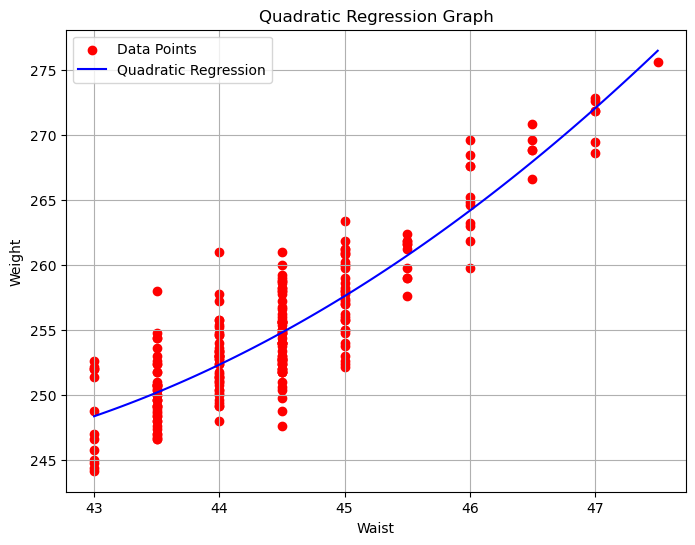

In [8]:
# Quadratic Model 1
x1 = subset['Waist']
x_squared = subset['Waist']**2
y = subset['Weight']
model5 = ols("y ~ x1 + x_squared", subset).fit()
print("Model 5")
print(model5.summary())
anova5 = anova_lm(model5)
print(anova5)

coefficients = np.polyfit(x1, y, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_values = np.linspace(min(x1), max(x1), 100)
y_values = polynomial(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, label='Data Points', color='red', marker='o')
plt.plot(x_values, y_values, label='Quadratic Regression', color='blue')
plt.xlabel('Waist')
plt.ylabel('Weight')
plt.title('Quadratic Regression Graph')
plt.legend()
plt.grid(True)
plt.show()

Model 6
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     50.28
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           9.46e-19
Time:                        22:37:01   Log-Likelihood:                -681.23
No. Observations:                 226   AIC:                             1368.
Df Residuals:                     223   BIC:                             1379.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    358.1375   1696.064      0.211 

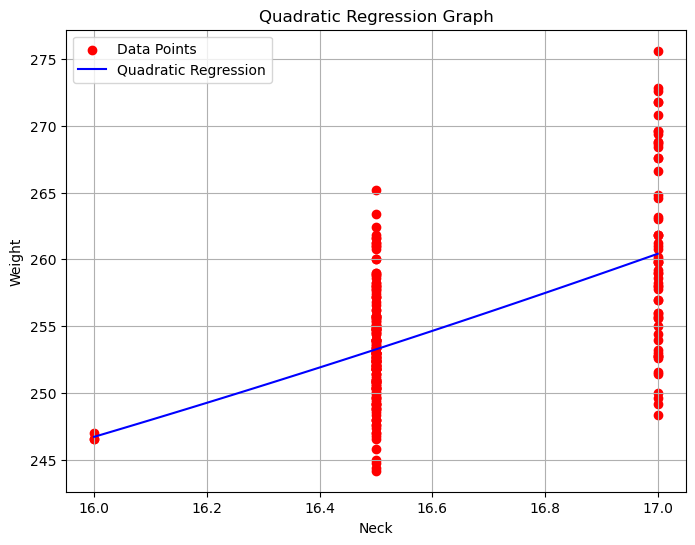

In [9]:
# Quadratic Model 2
x1 = subset['Neck']
x_squared = subset['Neck']**2
y = subset['Weight']
model6 = ols("y ~ x1 + x_squared", subset).fit()
print("Model 6")
print(model6.summary())
anova6 = anova_lm(model6)
print(anova6)

coefficients = np.polyfit(x1, y, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_values = np.linspace(min(x1), max(x1), 100)
y_values = polynomial(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, label='Data Points', color='red', marker='o')
plt.plot(x_values, y_values, label='Quadratic Regression', color='blue')
plt.xlabel('Neck')
plt.ylabel('Weight')
plt.title('Quadratic Regression Graph')
plt.legend()
plt.grid(True)
plt.show()

Model 7
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.005
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0515
Time:                        22:37:01   Log-Likelihood:                -720.28
No. Observations:                 226   AIC:                             1447.
Df Residuals:                     223   BIC:                             1457.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.4884      1.052    242.918 

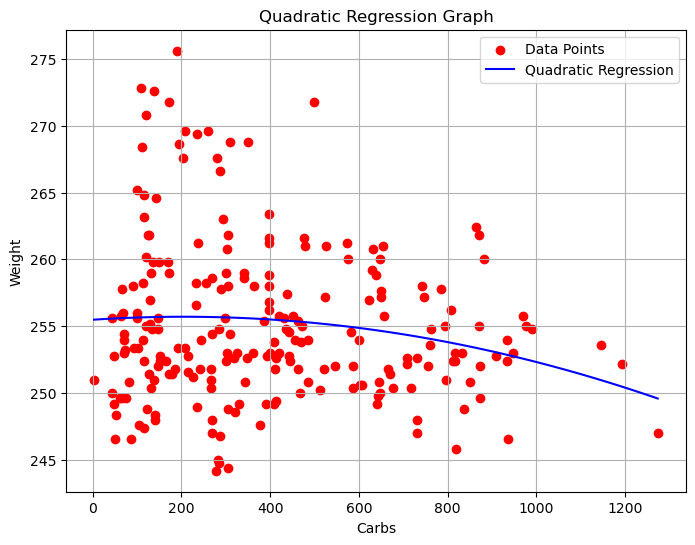

In [10]:
# Quadratic Model 3
x1 = subset['Carbs']
x_squared = subset['Carbs']**2
y = subset['Weight']
model7 = ols("y ~ x1 + x_squared", subset).fit()
print("Model 7")
print(model7.summary())
anova7 = anova_lm(model7)
print(anova7)

coefficients = np.polyfit(x1, y, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_values = np.linspace(min(x1), max(x1), 100)
y_values = polynomial(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, label='Data Points', color='red', marker='o')
plt.plot(x_values, y_values, label='Quadratic Regression', color='blue')
plt.xlabel('Carbs')
plt.ylabel('Weight')
plt.title('Quadratic Regression Graph')
plt.legend()
plt.grid(True)
plt.show()

Model 8
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.704
Date:                Sun, 30 Mar 2025   Prob (F-statistic):            0.00149
Time:                        22:37:02   Log-Likelihood:                -716.69
No. Observations:                 226   AIC:                             1439.
Df Residuals:                     223   BIC:                             1450.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.1480      0.766    335.518 

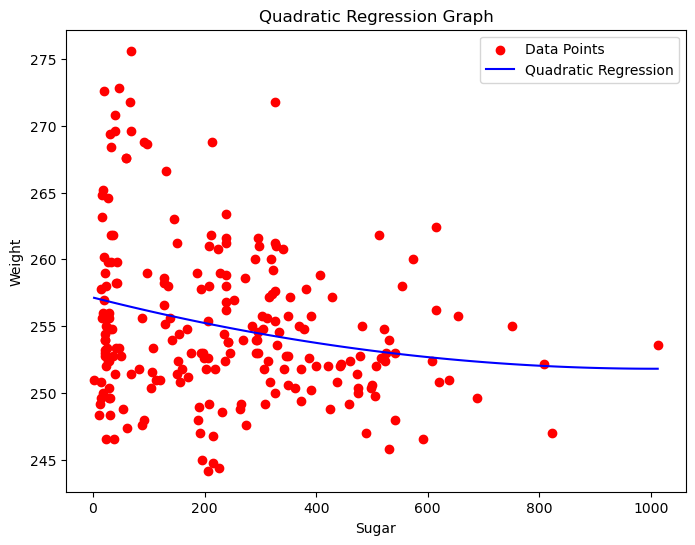

In [11]:
# Quadratic Model 4
x1 = subset['Sugar']
x_squared = subset['Sugar']**2
y = subset['Weight']
model8 = ols("y ~ x1 + x_squared", subset).fit()
print("Model 8")
print(model8.summary())
anova8 = anova_lm(model8)
print(anova8)

coefficients = np.polyfit(x1, y, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_values = np.linspace(min(x1), max(x1), 100)
y_values = polynomial(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, label='Data Points', color='red', marker='o')
plt.plot(x_values, y_values, label='Quadratic Regression', color='blue')
plt.xlabel('Sugar')
plt.ylabel('Weight')
plt.title('Quadratic Regression Graph')
plt.legend()
plt.show()

Model 9
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.522
Date:                Sun, 30 Mar 2025   Prob (F-statistic):             0.0826
Time:                        22:37:03   Log-Likelihood:                -720.76
No. Observations:                 226   AIC:                             1448.
Df Residuals:                     223   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    255.7096      1.627    157.211 

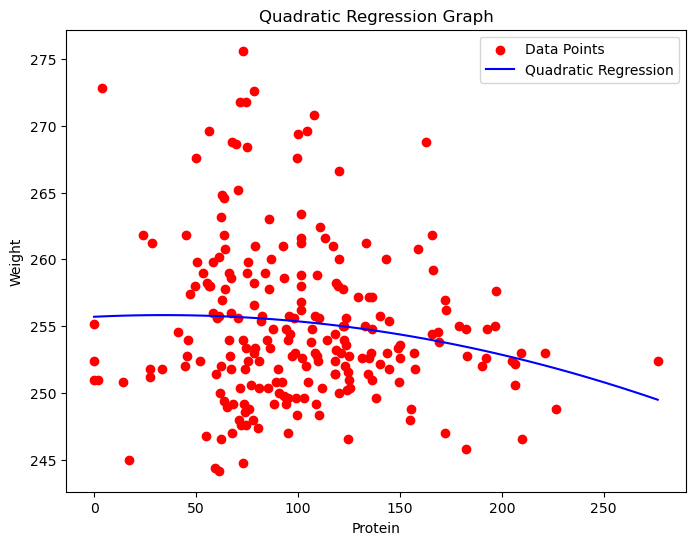

In [12]:
# Quadratic Model 5
x1 = subset['Protein']
x_squared = subset['Protein']**2
y = subset['Weight']
model9 = ols("y ~ x1 + x_squared", subset).fit()
print("Model 9")
print(model9.summary())
anova9 = anova_lm(model9)
print(anova9)

coefficients = np.polyfit(x1, y, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_values = np.linspace(min(x1), max(x1), 100)
y_values = polynomial(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, label='Data Points', color='red', marker='o')
plt.plot(x_values, y_values, label='Quadratic Regression', color='blue')
plt.xlabel('Protein')
plt.ylabel('Weight')
plt.title('Quadratic Regression Graph')
plt.legend()
plt.show()

In [13]:
## Collecting Regression Results
models = model1, model2, model3, model4, model5, model6, model7, model8, model9

def results(rows):
    for i in range(0, rows + 1):
        print('Regression Model', i+1, '------')
        print('\n Adjusted R^2:', models[i].rsquared_adj, end="")
        print('\n F Statistics:', models[i].fvalue, end="")
        print('\n P-Value:', models[i].f_pvalue, end="")
        print('\n MSE:', models[i].mse_resid, end="")
        S2 = models[i].mse_resid,
        S = np.sqrt(S2)
        CV = 100*(S/subset['Weight'].mean())
        print('\n Coefficient Of Variation', CV[0].astype(float), end="")
        print('\n')
results(8)

Regression Model 1 ------

 Adjusted R^2: 0.7944272698126127
 F Statistics: 290.8343821266306
 P-Value: 1.3180698024912785e-76
 MSE: 7.281814470719875
 Coefficient Of Variation 1.0577517070580722

Regression Model 2 ------

 Adjusted R^2: 0.10038585703858083
 F Statistics: 9.369076160929644
 P-Value: 7.407488128924458e-06
 MSE: 31.86620753788402
 Coefficient Of Variation 2.21273354722157

Regression Model 3 ------

 Adjusted R^2: 0.011504055950026348
 F Statistics: 1.8728454592509287
 P-Value: 0.13503170055315447
 MSE: 35.01458614218779
 Coefficient Of Variation 2.3194682329104106

Regression Model 4 ------

 Adjusted R^2: 0.04485734327840729
 F Statistics: 4.522301849053722
 P-Value: 0.004227484175635906
 MSE: 33.83314320424317
 Coefficient Of Variation 2.2800013470226017

Regression Model 5 ------

 Adjusted R^2: 0.792987105175039
 F Statistics: 431.94440763037505
 P-Value: 2.0014806306879693e-77
 MSE: 7.332828103162966
 Coefficient Of Variation 1.0614503443418957

Regression Model 6

In [14]:
## Storing Model T Values
T = {'model1': model1.tvalues, 'model2': model2.tvalues, 'model3': model3.tvalues, 'model4': model4.tvalues, 'model5': model5.tvalues, 'model6': model6.tvalues, 'model7': model7.tvalues, 
     'model8': model8.tvalues, 'model9': model9.tvalues}
print(T)

{'model1': Intercept    3.570454
x1          -3.218919
x2          -3.540200
x1:x2        3.614525
dtype: float64, 'model2': Intercept    286.054119
x1             3.527353
x2            -4.167754
x1:x2          0.201393
dtype: float64, 'model3': Intercept    155.319439
x1            -0.414535
x2            -0.472074
x1:x2         -0.135308
dtype: float64, 'model4': Intercept    168.601905
x1            -0.815087
x2            -1.826122
x1:x2          0.694545
dtype: float64, 'model5': Intercept    4.307179
x1          -3.882374
x_squared    4.304425
dtype: float64, 'model6': Intercept    0.211158
x1          -0.130029
x_squared    0.199983
dtype: float64, 'model7': Intercept    242.917660
x1             0.436540
x_squared     -1.112108
dtype: float64, 'model8': Intercept    335.517844
x1            -1.979489
x_squared      0.682693
dtype: float64, 'model9': Intercept    157.210689
x1             0.251285
x_squared     -0.887873
dtype: float64}


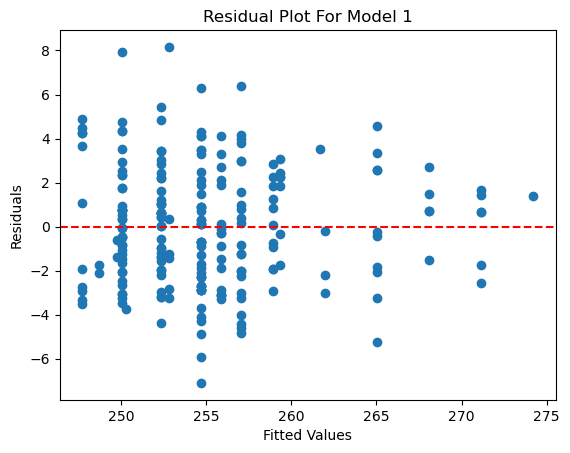

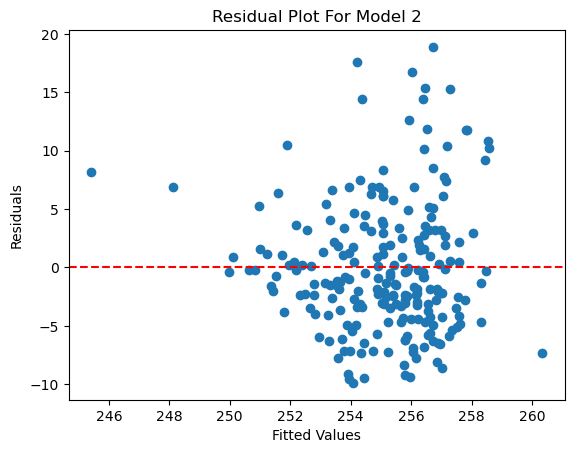

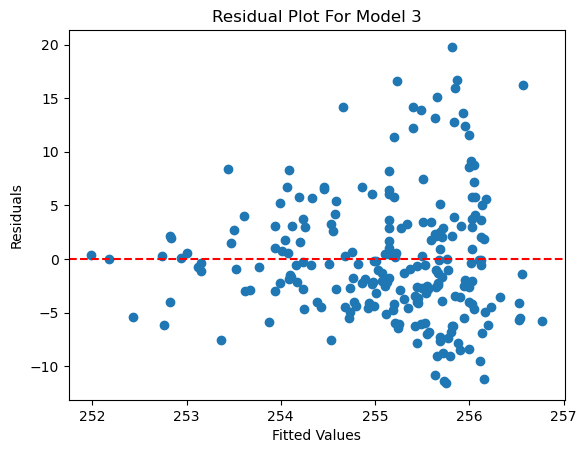

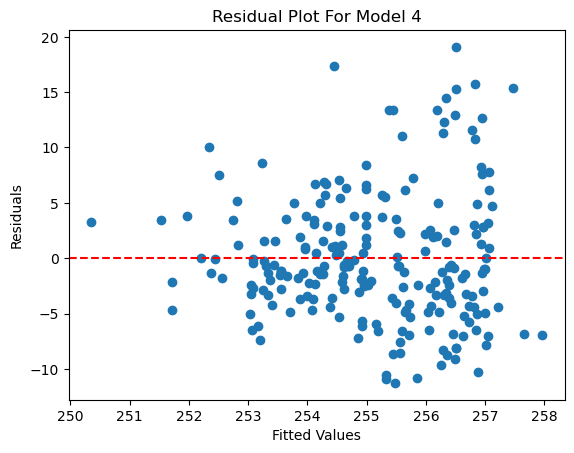

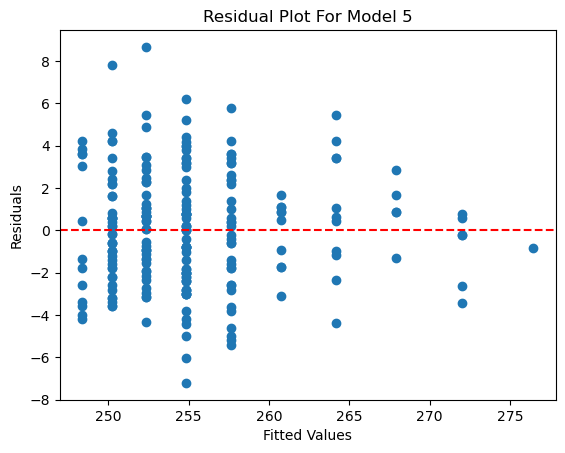

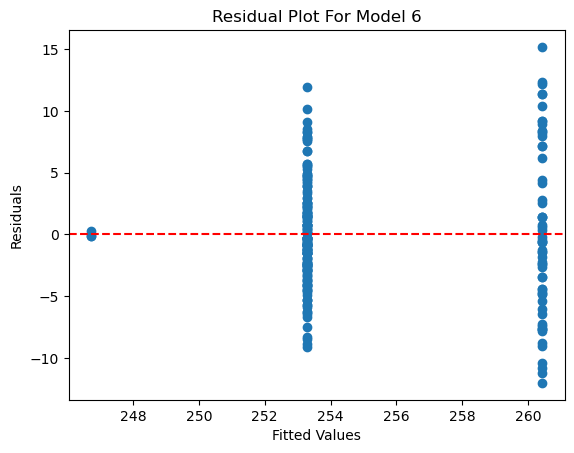

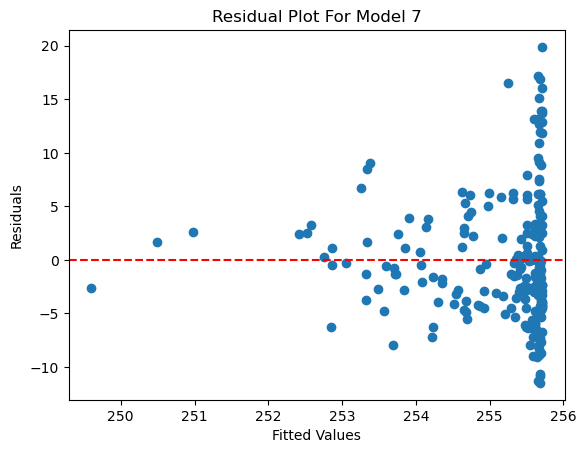

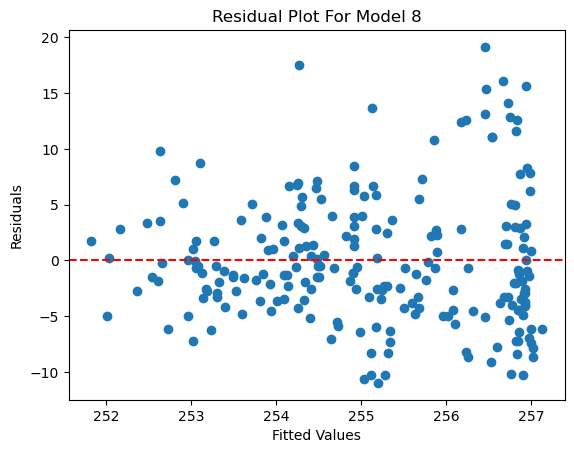

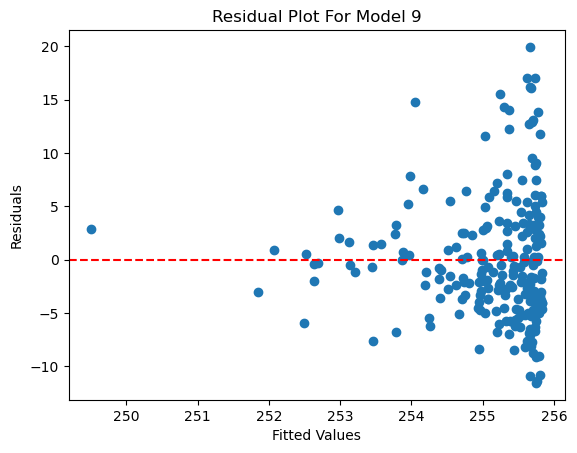

In [15]:
## Residual Plots For All Models
models = model1, model2, model3, model4, model5, model6, model7, model8, model9
for i in models:
    residuals = i.resid
    plt.scatter(i.fittedvalues, residuals)
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    #plt.title("Residual Plot For Model", i)
    plt.title(f"Residual Plot For Model {models.index(i)+1}")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

            Weight     Waist      Neck  Calories     Carbs      Fat   \
Weight    1.000000  0.881919  0.557379 -0.124220 -0.144378 -0.071397   
Waist     0.881919  1.000000  0.550281 -0.180636 -0.194545 -0.141247   
Neck      0.557379  0.550281  1.000000 -0.297680 -0.365371 -0.203189   
Calories -0.124220 -0.180636 -0.297680  1.000000  0.950487  0.917631   
Carbs    -0.144378 -0.194545 -0.365371  0.950487  1.000000  0.783740   
Fat      -0.071397 -0.141247 -0.203189  0.917631  0.783740  1.000000   
Protein  -0.136600 -0.161825 -0.148037  0.759646  0.609489  0.785385   
Fiber     0.030527  0.076247 -0.106472  0.402702  0.420077  0.349996   
Sugar    -0.233977 -0.272036 -0.422769  0.839256  0.946801  0.614049   

           Protein     Fiber     Sugar  
Weight   -0.136600  0.030527 -0.233977  
Waist    -0.161825  0.076247 -0.272036  
Neck     -0.148037 -0.106472 -0.422769  
Calories  0.759646  0.402702  0.839256  
Carbs     0.609489  0.420077  0.946801  
Fat       0.785385  0.349996  0.6

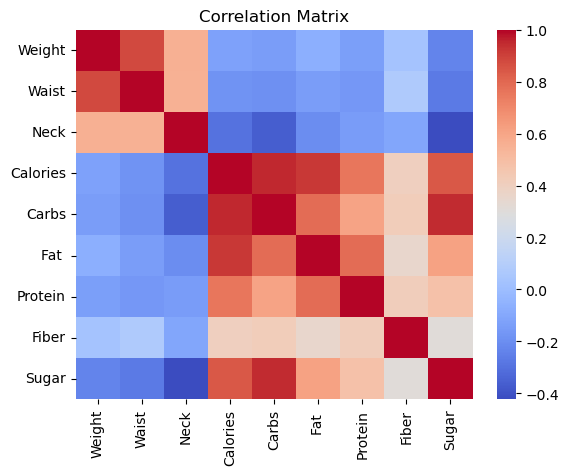

In [16]:
# Creating a Correlation Matrix to Check Multicollinearity
corr_matrix = subset.corr(method='pearson')
print(corr_matrix)

sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
## Variance Inflation Factor For Each Model
models = model1, model2, model3, model4, model5, model6, model7, model8, model9
for i in models:
    reg = i.model.exog
    vif = [variance_inflation_factor(reg, i) for i in range(reg.shape[1])]
    print(f"Model {models.index(i)+1}: {vif}")

Model 1: [11269339.490349075, 4773.3666410505275, 2186.66823385912, 10512.112770323909]
Model 2: [5.665906836901934, 10.75815891091151, 13.376498256449638, 9.65912943267977]
Model 3: [17.640896359389817, 7.529029339232775, 4.077909113145341, 14.10915879693556]
Model 4: [15.639392961516513, 3.4817922951925304, 7.939172273831812, 13.47049839946246]
Model 5: [2839094.7043166975, 4756.03329618188, 4756.03329618188]
Model 6: [26393249.786742285, 20544.223608505134, 20544.223608505134]
Model 7: [7.1834237969129004, 12.082950311864604, 12.082950311864604]
Model 8: [3.937762894755645, 7.139271259880043, 7.139271259880043]
Model 9: [17.108011287352962, 11.883017866696601, 11.883017866696601]
